# アンサンブル機械学習

アンサンブル機械学習とは、複数の学習機を組み合わせて、学習能力を向上させる方法.
ここでは、Adaboost, Randomforest, ExtraTree, ExtraTrees, GradientBoosting, Bagging, 多数決分類器(VotingClassifier)の7つの例を紹介.

### 3.0 アダブースト(Adaboost)

これは、サポートベクトル分類器(SVC)をアダブースト分類器（AdaboostClassifier)でアンサンブルする学習法.

単純なSVC機械学習モデル(clf1)とSVC＋アダブースト機械学習モデル(clf2)とを比較してみる.

clf1 = SVC(probability=True, kernel='linear')

clf2 = AdaboostClassifier(SVC(probability=True, kernel='linear'), n_estimators=100, learning_rate=1.0, algorithm='SAMME)

0.967741935484
0.967741935484


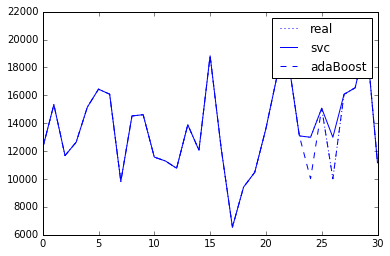

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf1 = SVC(probability=True, kernel='linear')
clf2 = AdaBoostClassifier(SVC(probability=True, kernel='linear'), n_estimators=100, learning_rate=1.0, algorithm='SAMME')
clf1.fit(x, y)
clf2.fit(x, y)
p1=clf1.predict(x)
p2=clf2.predict(x)
print(clf1.score(x,y))
print(clf2.score(x,y))
t = np.arange(0.0, 31.0)
plt.plot(t, data['ice'], ':b', t, p1, '-b', t, p2, '--b')
plt.legend(('real', 'svc', 'adaBoost'))
plt.show()

次に、決定木回帰(DicisionTreeRegressor)をアダブースト手法でアンサンブル学習してみる.

単純な決定木回帰学習モデル(clf1)と決定木回帰+アダブースト学習(clf2)は、次式で表現する.

clf1 = DicisionTreeRegressor(max_depth=4)

clf2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

0.766011846555
0.9603546744


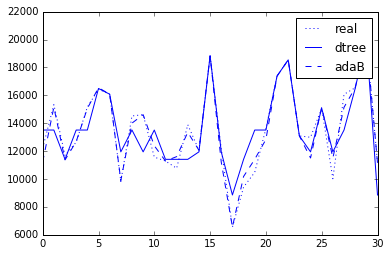

In [9]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

rng=np.random.RandomState(1)
clf1 = DecisionTreeRegressor(max_depth=4)
clf2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)
clf1.fit(x, y)
clf2.fit(x, y)
p1=clf1.predict(x)
p2=clf2.predict(x)
print(clf1.score(x,y))
print(clf2.score(x,y))
t = np.arange(0.0, 31.0)
plt.plot(t, y, ':b', t, p1, '-b', t, p2, '--b')
plt.legend(('real', 'dtree', 'adaB'))
plt.show()

### 3.1 ランダムフォーレスト(RandomForest)

ランダムフォーレストという名前は、森が多くの木から成り立っていることから来ている.

木の数は、n_estimators = 200という具合に指定する.

木の数は、多いほど良いというわけではなく、データによって最適な木の数がある.

clf = RandomForestClassifier(n_estimators=200, min_samples_split=1)

0.967741935484
[ 0.37586576  0.62413424]


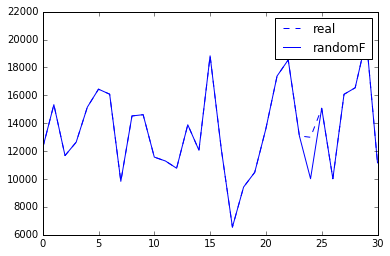

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = RandomForestClassifier(n_estimators=200, min_samples_split=1)
clf.fit(x, y)
print(clf.score(x,y))
print(clf.feature_importances_)
p=clf.predict(x)
t = np.arange(0.0, 31.0)
plt.plot(t, y, '--b', t, p, '-b')
plt.legend(('real','randomF'))
plt.show()

### 3.2 エキストラツリー(ExtraTree)

エキストラツリーの機械学習モデルclfは、次式で表現する.

clf = ExtraTreeClassifier()

0.967741935484
[ 0.31034483  0.68965517]


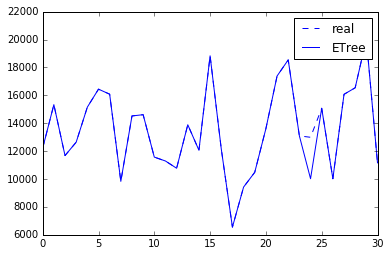

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = ExtraTreeClassifier()
clf.fit(x, y)
print(clf.score(x,y))
print(clf.feature_importances_)
p=clf.predict(x)
t = np.arange(0.0, 31.0)
plt.plot(t, y, '--b', t, p, '-b')
plt.legend(('real','ETree'))
plt.show()

### 3.3 エキストラツリーズ(ExtraTrees)

エキストラツリーズの機械学習モデルclfは、次式で表現できる.

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_sample_split=1, random_state=0)

0.967741935484
[ 0.36241379  0.63758621]


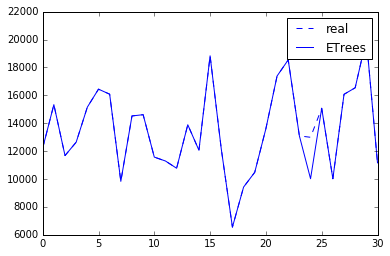

In [13]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=1, random_state=0)
clf.fit(x, y)
print(clf.score(x,y))
print(clf.feature_importances_)
p=clf.predict(x)
t = np.arange(0.0, 31.0)
plt.plot(t, y, '--b', t, p, '-b')
plt.legend(('real','ETrees'))
plt.show()

### 3.4 グラディエントブースティング(GradientBoosting)

グラディエントブースティングの機械学習モデルclfは次式で表現できる.

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.2, max_depth=1, random_state=0)

0.967741935484
[ 0.01054839  0.10416129]


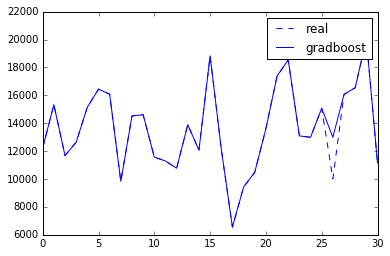

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.2, max_depth=1, random_state=0)
clf.fit(x, y)
print(clf.score(x,y))
print(clf.feature_importances_)
p=clf.predict(x)
t = np.arange(0.0, 31.0)
plt.plot(t, y, '--b', t, p, '-b')
plt.legend(('real','gradboost'))
plt.show()

### 3.5 バッギング(Bagging)

KNeighborsClssifier機械学習モデル(clf1)とKNeighborsClassifier+バッギング機械学習モデル(clf2)を比較する

clf1 = KNeighborsClassifier()

clf2 = BaggingClassifier(KNeighborsClassifier(), n_estimators=300, max_samples=0.8, max_features=0.5)

0.967741935484
0.967741935484


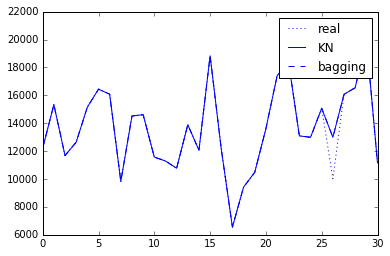

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = BaggingClassifier(KNeighborsClassifier(n_neighbors=1), n_estimators=300, max_samples=0.8, max_features=0.5)
clf1.fit(x, y)
clf2.fit(x, y)
p1=clf1.predict(x)
p2=clf2.predict(x)
print(clf1.score(x,y))
print(clf2.score(x,y))
t = np.arange(0.0, 31.0)
plt.plot(t, y, ':b', t, p1, '-b', t, p2, '--b')
plt.legend(('real', 'KN', 'bagging'))
plt.show()

ExtraTreesの機械学習モデル(clf1)とExtraTrees+バッギング機械学習モデル(clf2)を比較する.

clf1 = ExtraTreesClassifier()

clf2 = BaggingClassifier(ExtraTreesClassifier(), n_estimators=300, max_samples=0.8, max_features=0.5)

0.967741935484
0.967741935484


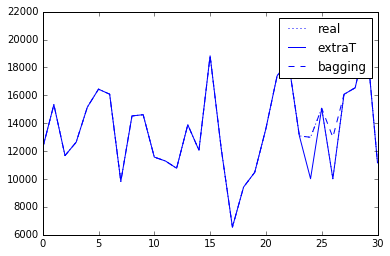

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('../data/ice.csv')
x = data[['temp', 'street']]
y = data['ice']

clf1 = ExtraTreesClassifier()
clf2 = BaggingClassifier(ExtraTreesClassifier(), n_estimators=300, max_samples=0.8, max_features=0.5)
clf1.fit(x, y)
clf2.fit(x, y)
p1=clf1.predict(x)
p2=clf2.predict(x)
print(clf1.score(x,y))
print(clf2.score(x,y))
t = np.arange(0.0, 31.0)
plt.plot(t, y, ':b', t, p1, '-b', t, p2, '--b')
plt.legend(('real', 'extraT', 'bagging'))
plt.show()

### 3.6 多数決分類器(VotingClassifier)

多数決分類機は、アンサンブル学習をさらに向上させることができる有効な手法.

分類器clf1, 分類器clf2, ..., 分類器clfNがあるとすれば、多数決分類器(clf)は、次のようなコマンドでN個の分類機を使った多数決分類が可能になる.

clf = VotingClassifier(estimators=[('a1', clf1), ('a2',clf2), ... , ('aN',clfN)], voting='soft', weights=[2,1,....,5]).fit(x,y)

ここで重要な役割を果たすのが、weights=[2,1,...5]の重み関数である. 分類の重みを変えることで、結果も大きく変わる. 重み付き多数決分類器と呼ばれる.

voting='soft'の場合、それぞれの分類器の平均予測確率を最大値にする計算に基づいて分類する. voting='hard'の場合は、単純な多数決投票にもとづいて計算する.

重みなし多数決分類器では、それぞれの特徴による多数決分類のための"strength of evidence"の違いを考慮せずに、すべての多数決の票に「同等」の重みを与える.